# 6.2 - Regresyon Problemleri ve Lineer Regresyon Modeli: Basit Lineer Regresyon ve OLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#import warnings

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
title_font = {"family":"serif", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"arial", "weight":"normal", "color":"darkgreen", "size":14}
# warnings.filterwarnings("ignore")

In [2]:
house = pd.read_csv("house_prices.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for i in house.columns[1:]:
    print("Unique values of {}:\n".format(i), house[i].unique())

Unique values of MSSubClass:
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values of MSZoning:
 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values of LotFrontage:
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values of LotArea:
 [ 8450  9600 11250 ... 17217 13175  9717]
Unique values of Street:
 ['Pave' 'Grvl']
Unique values of Alley:
 [nan 'Grvl' 'Pave']
Unique values of LotShape:
 ['Reg' 'IR1' 'IR2' 'IR3']
Unique values of LandContour:
 ['Lvl' 'Bnk'

 295  32 366 736]
Unique values of OpenPorchSF:
 [ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200  92 180 263 304 229 103 211 287 292 241 547  91  86 262 210
 141  15 126 236]
Unique values of EnclosedPorch:
 [  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40

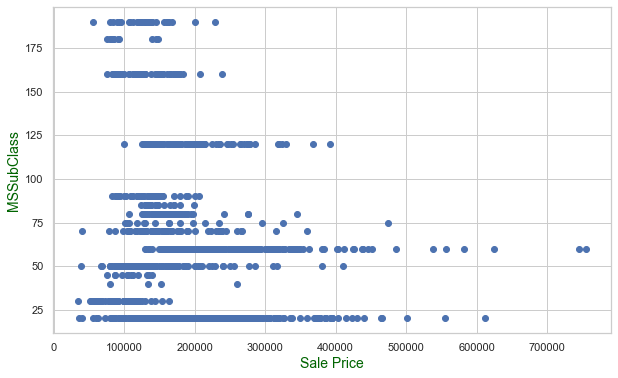

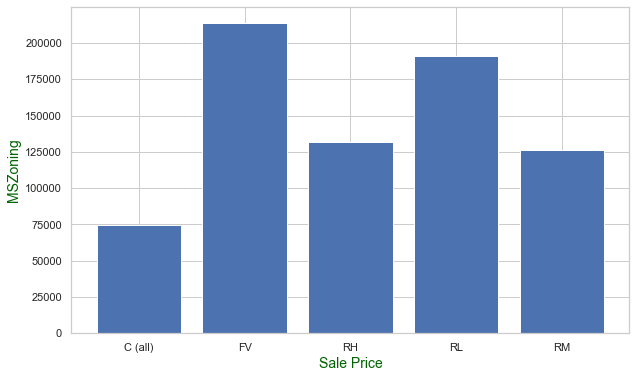

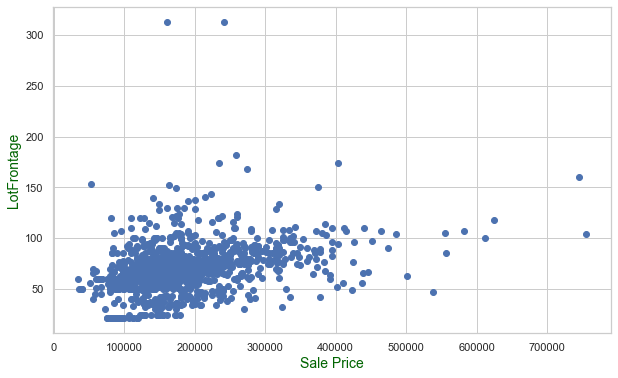

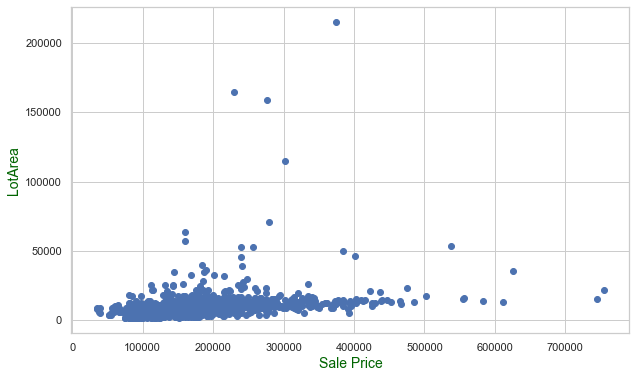

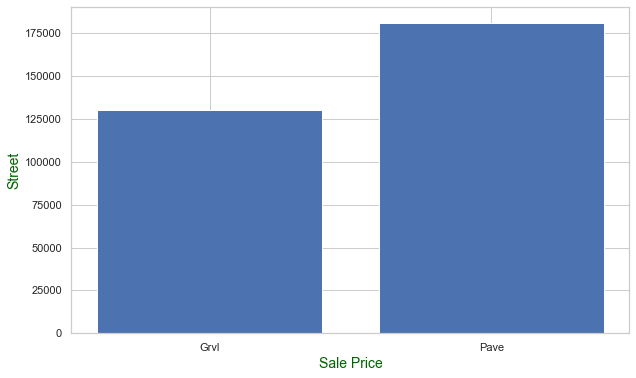

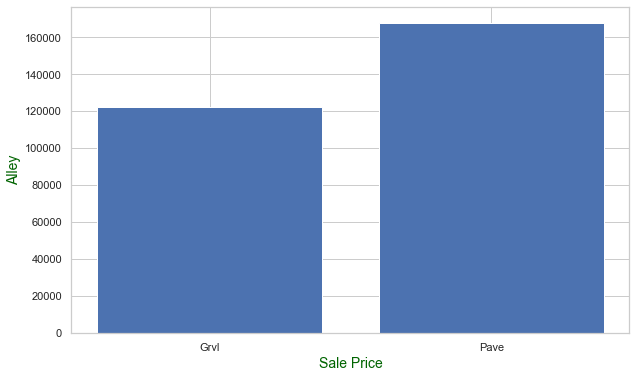

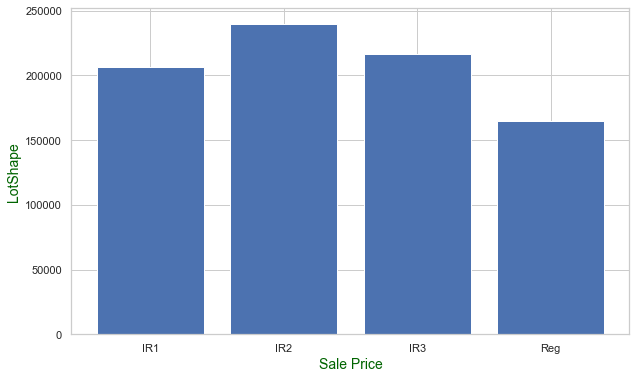

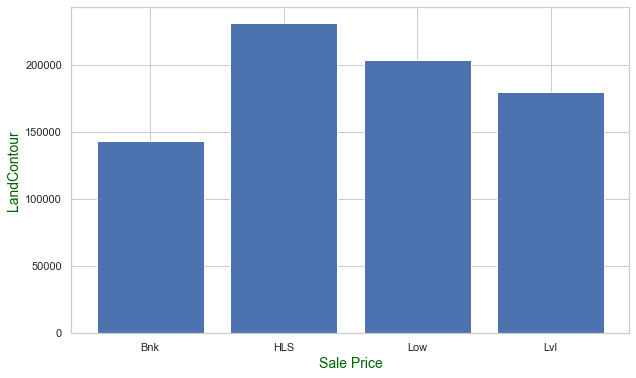

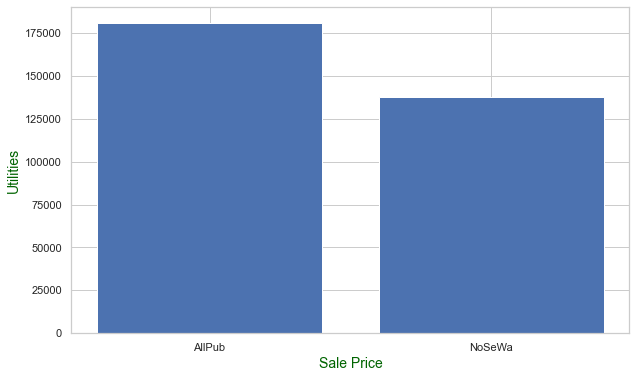

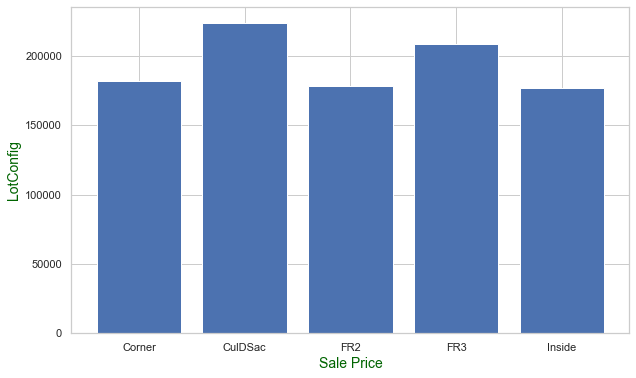

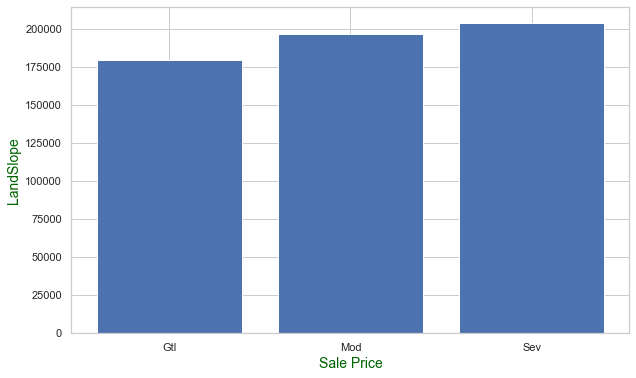

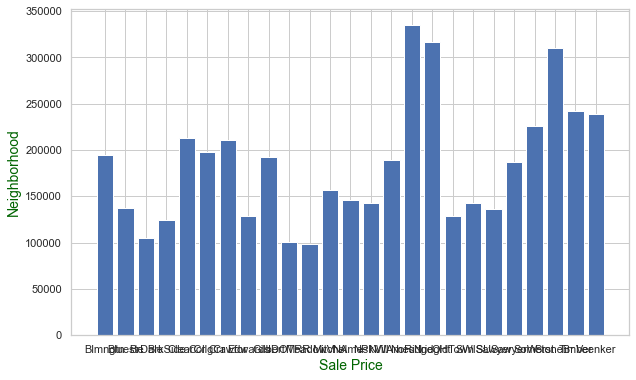

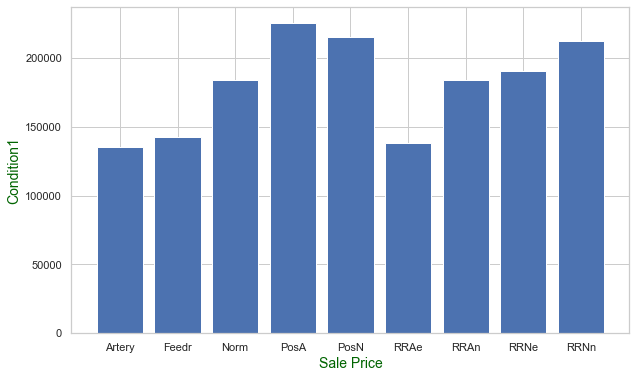

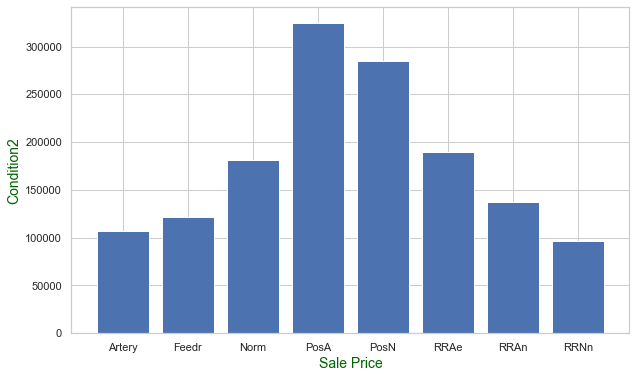

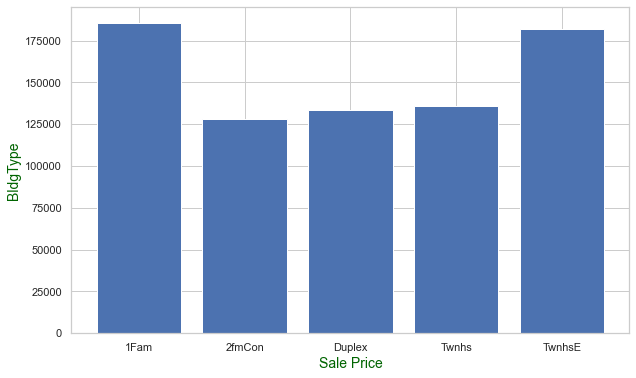

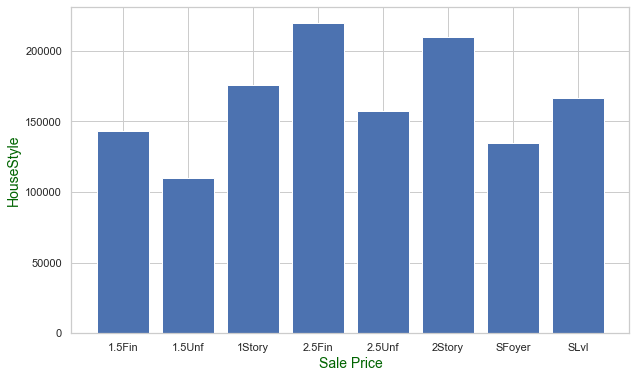

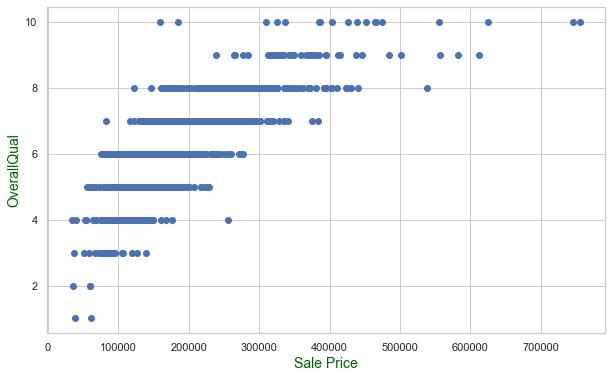

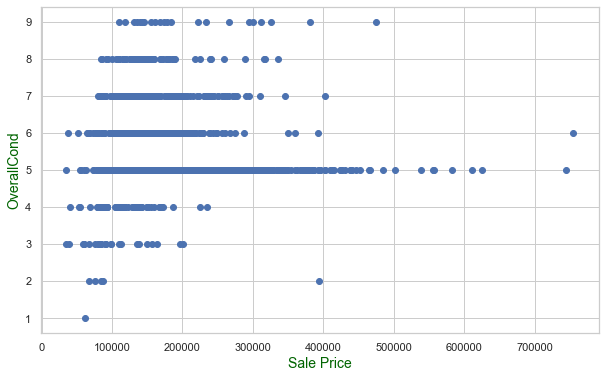

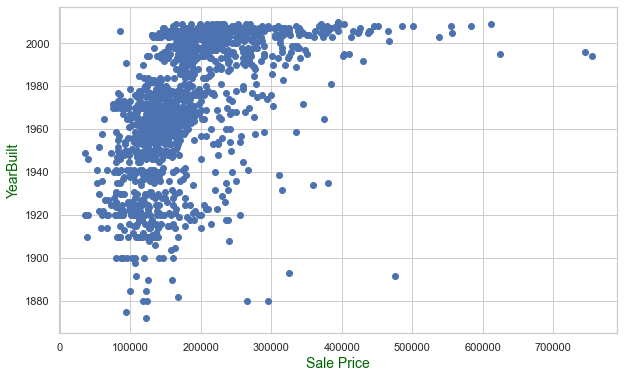

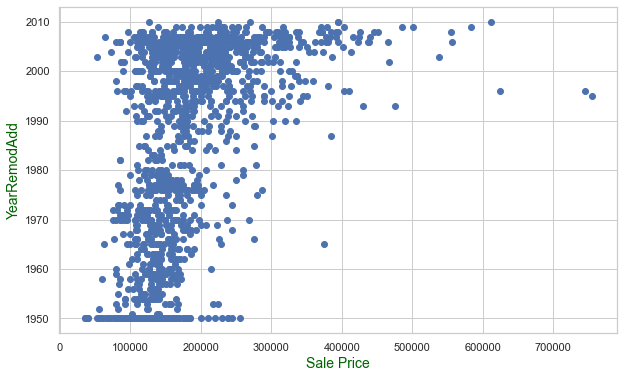

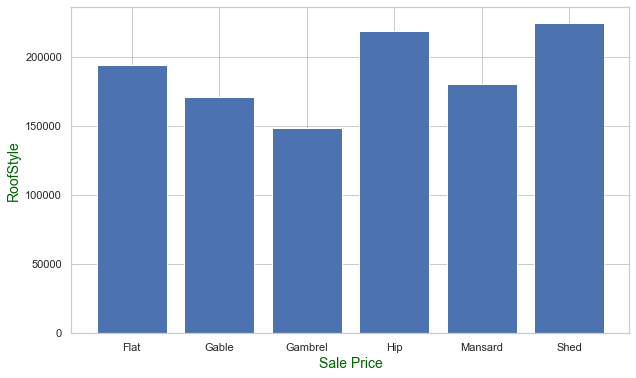

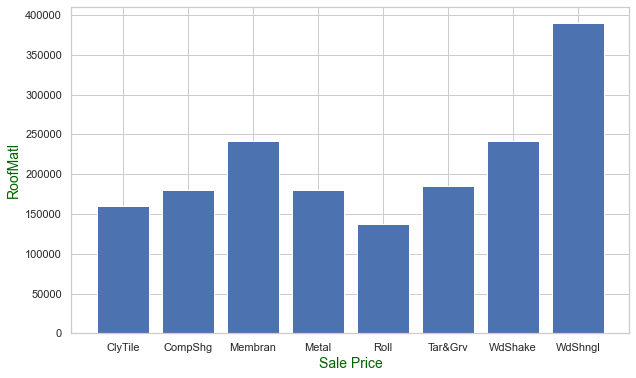

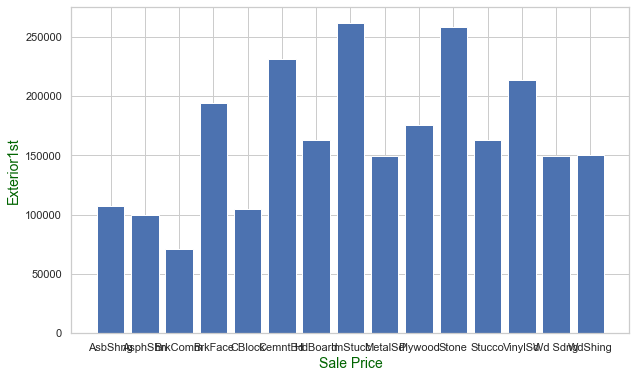

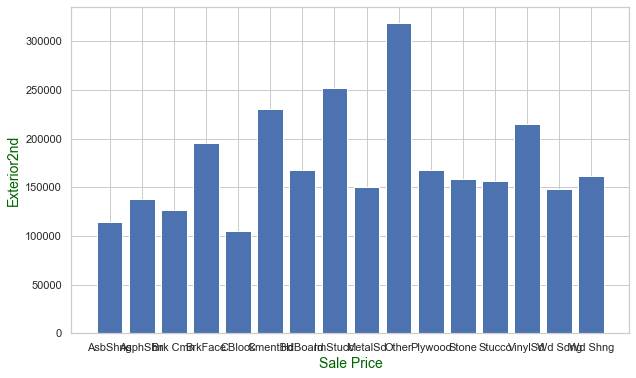

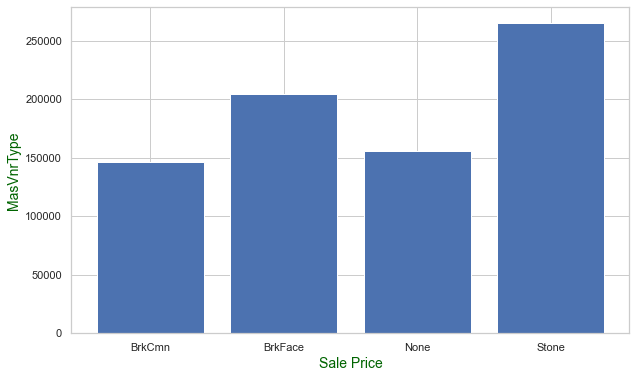

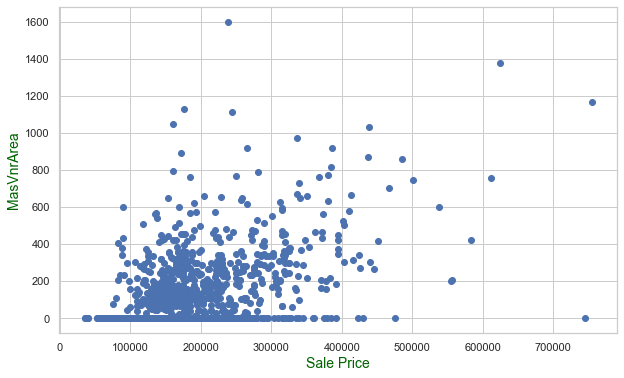

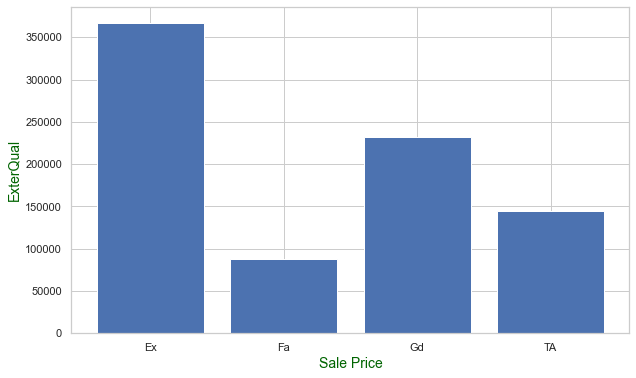

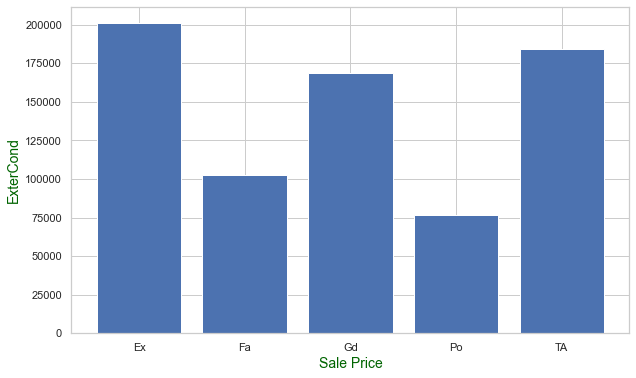

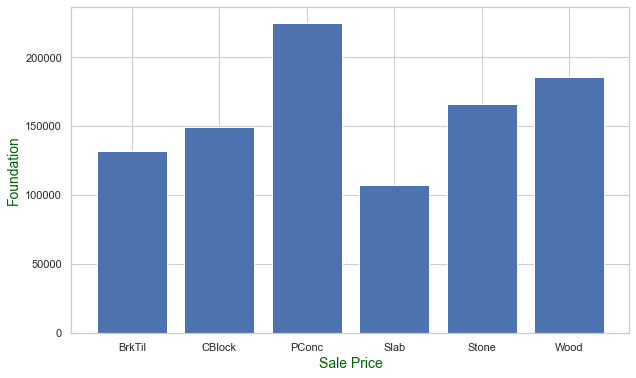

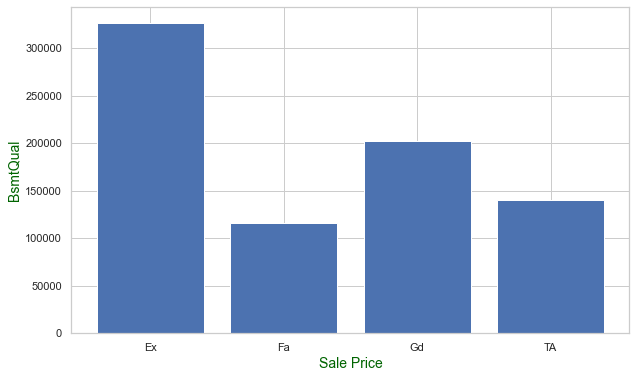

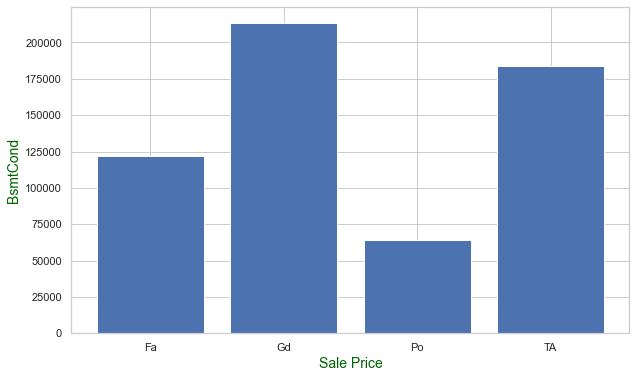

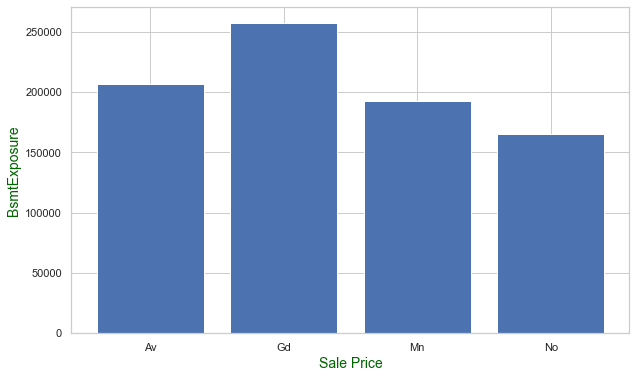

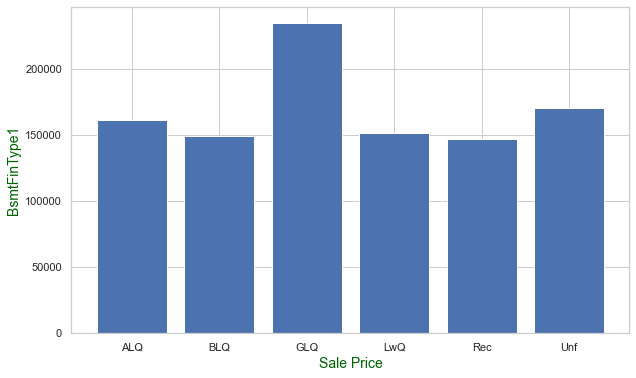

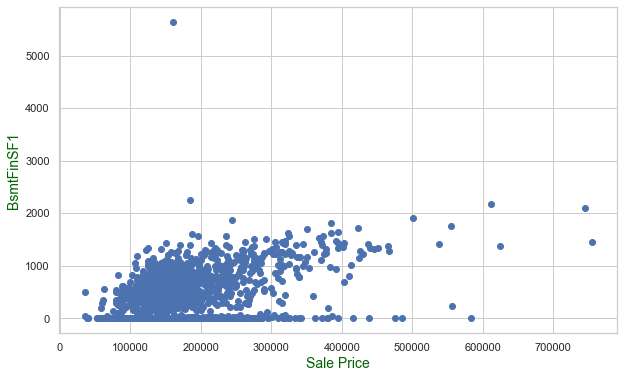

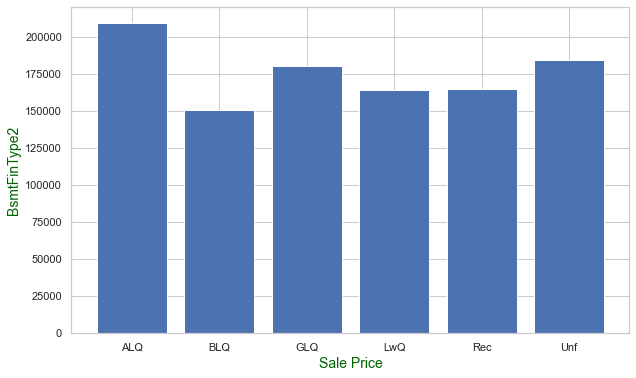

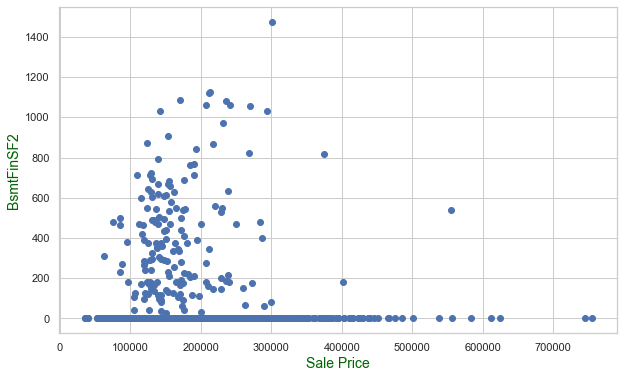

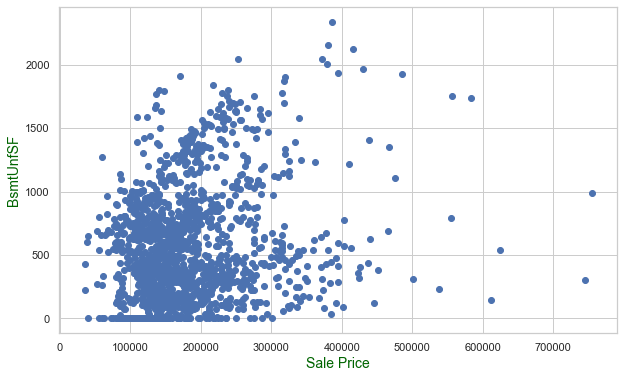

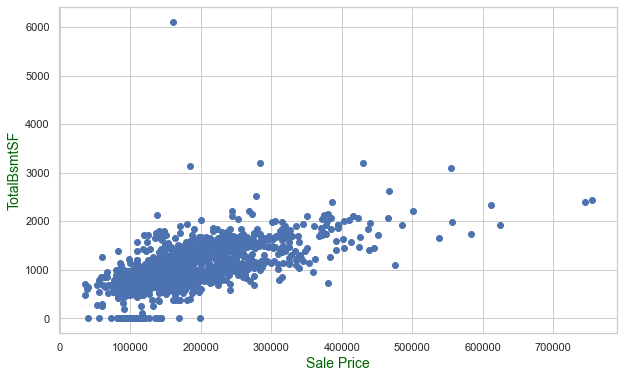

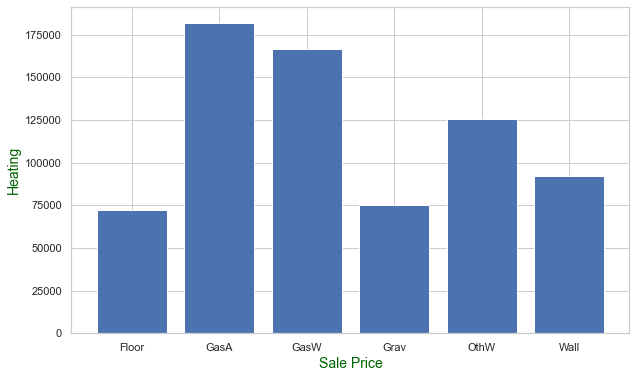

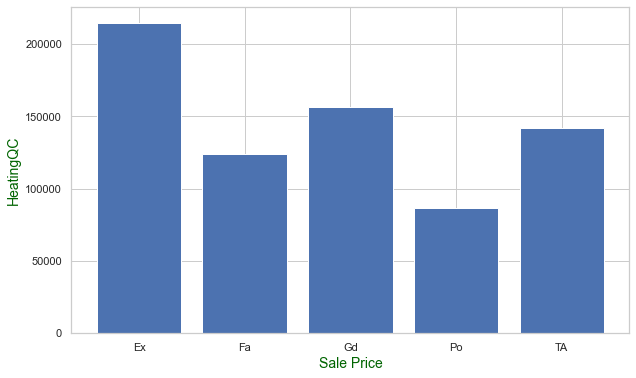

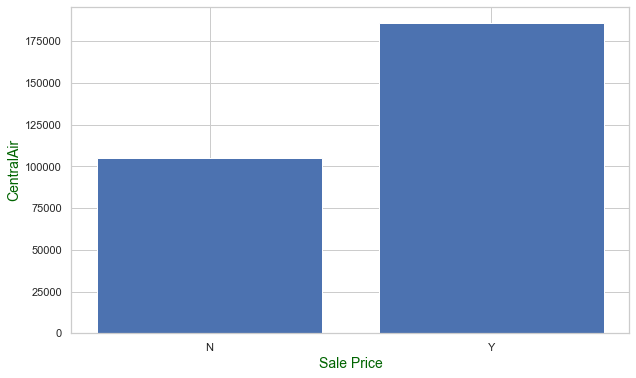

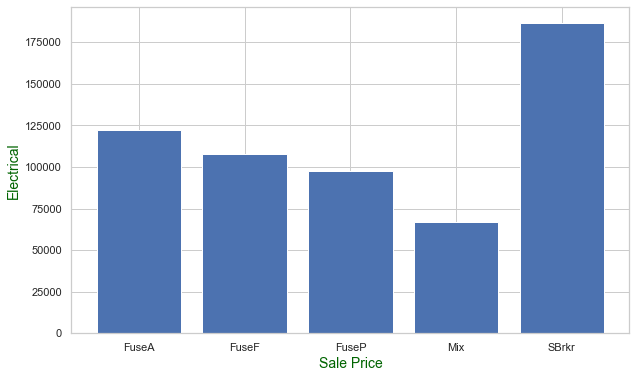

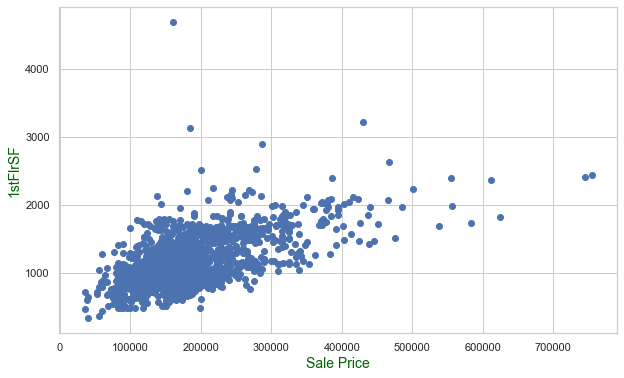

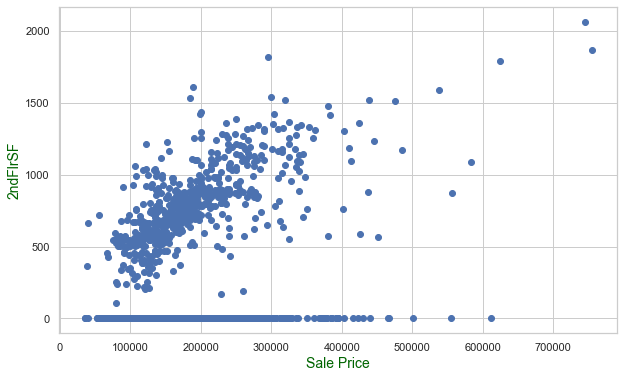

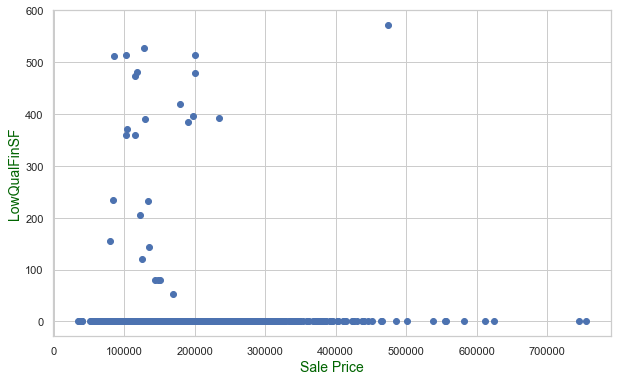

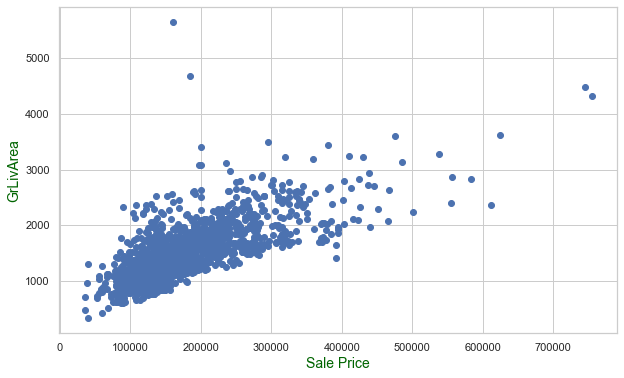

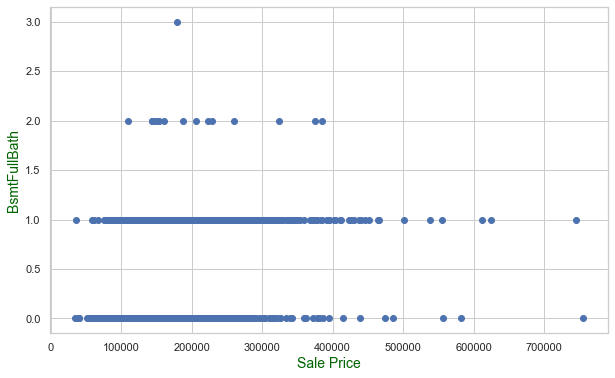

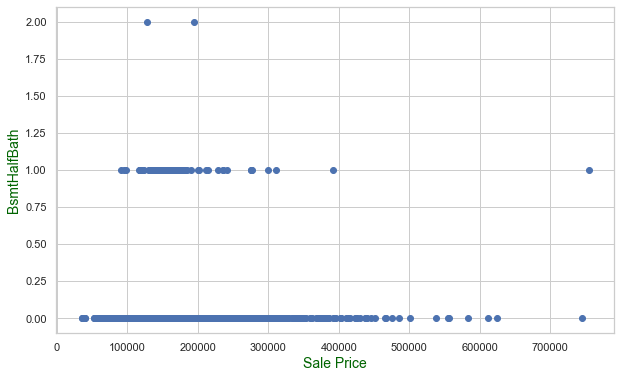

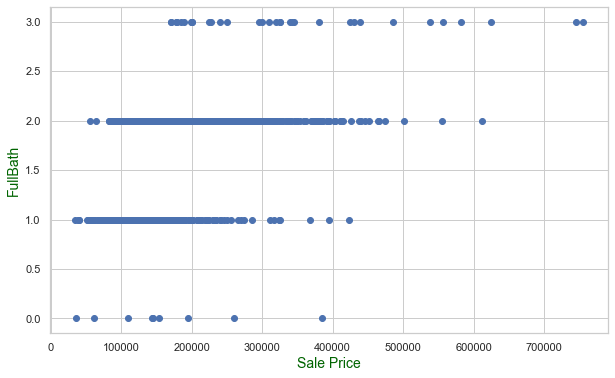

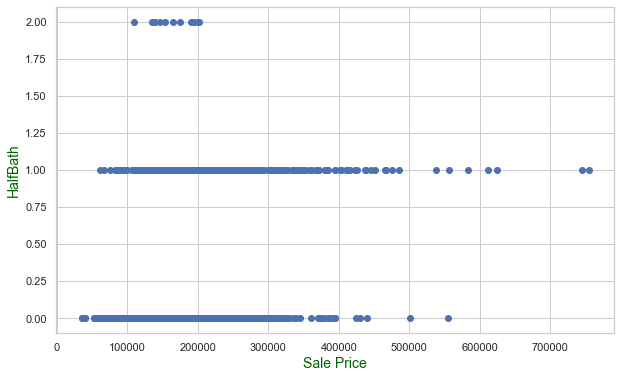

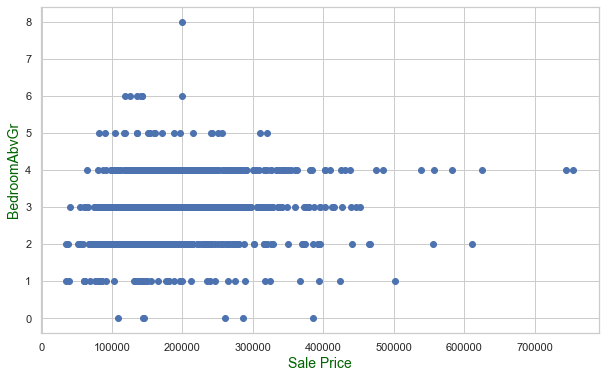

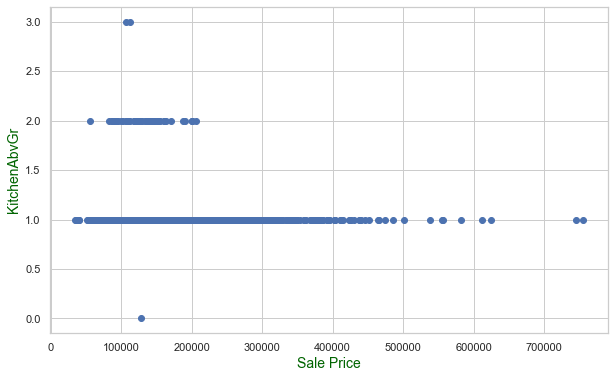

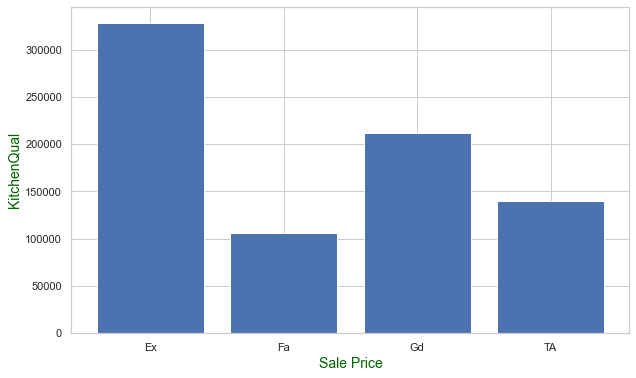

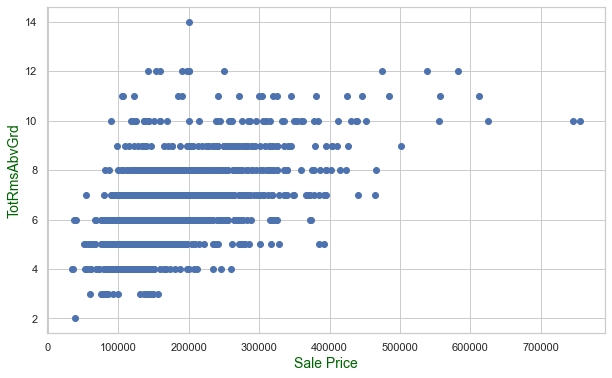

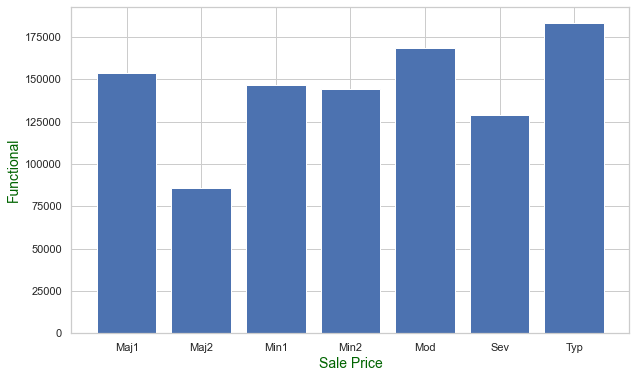

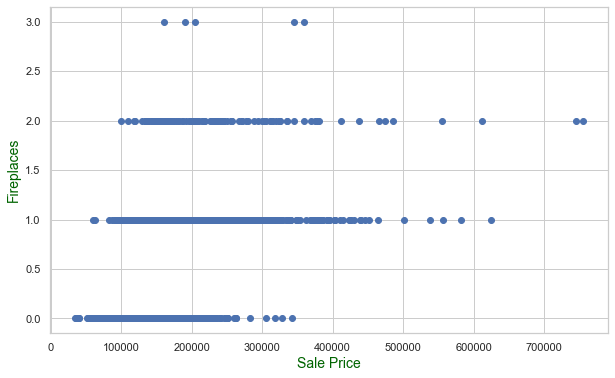

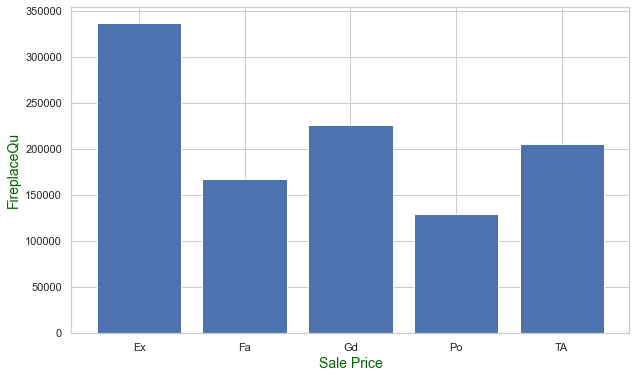

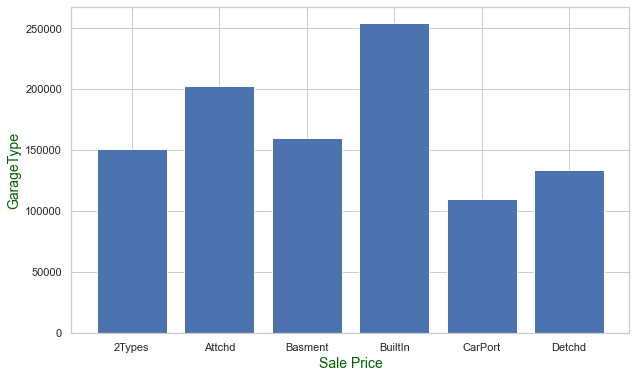

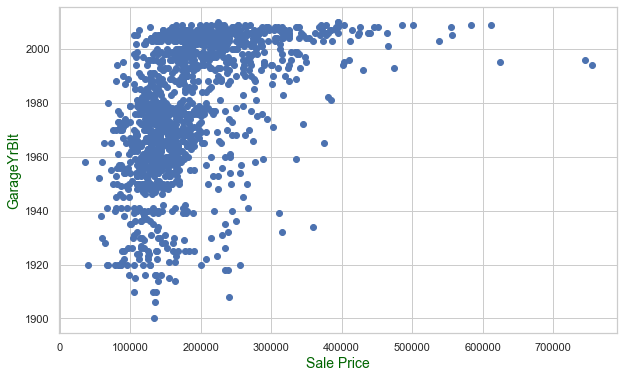

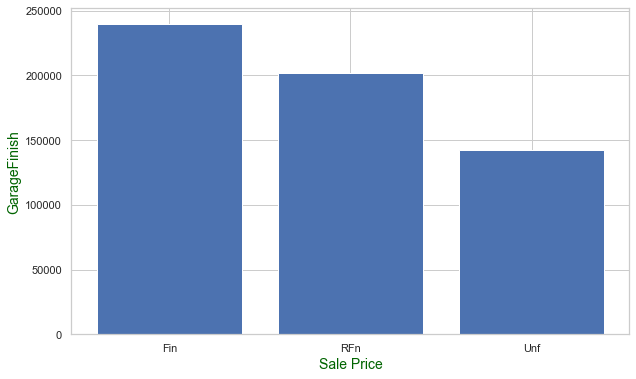

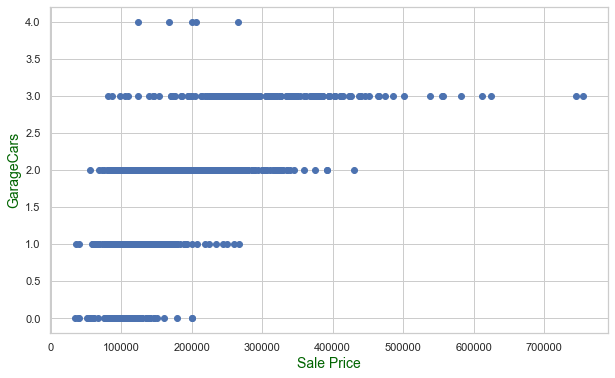

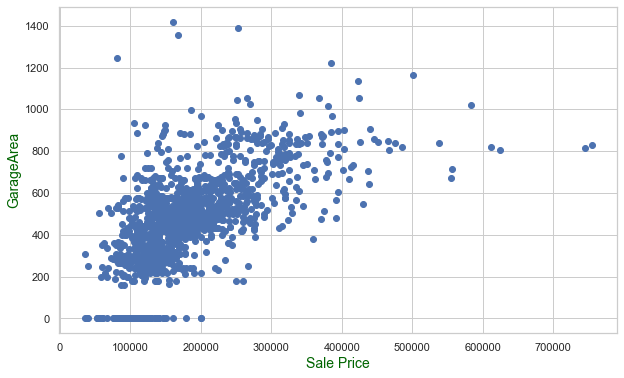

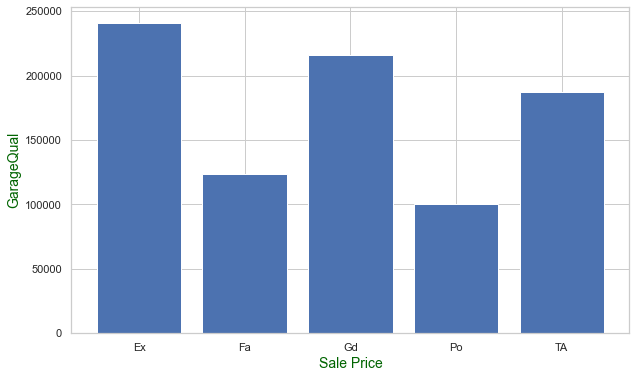

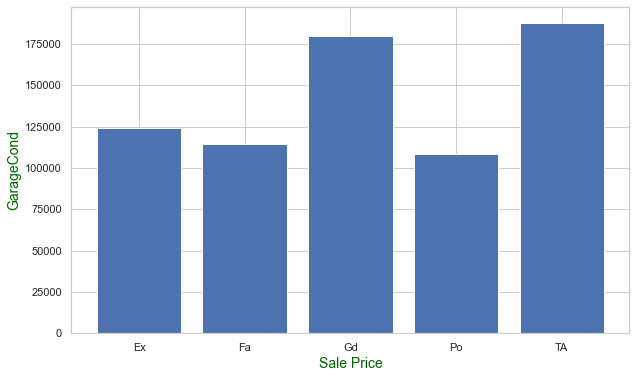

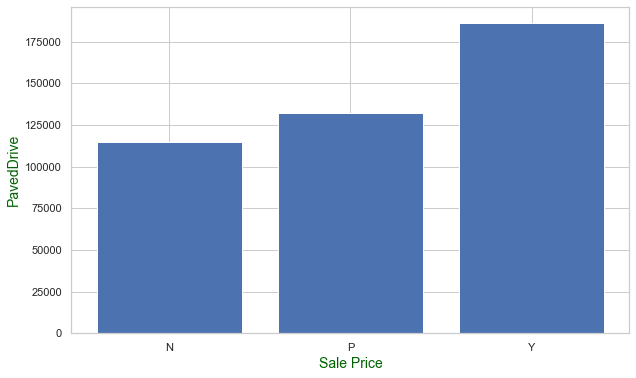

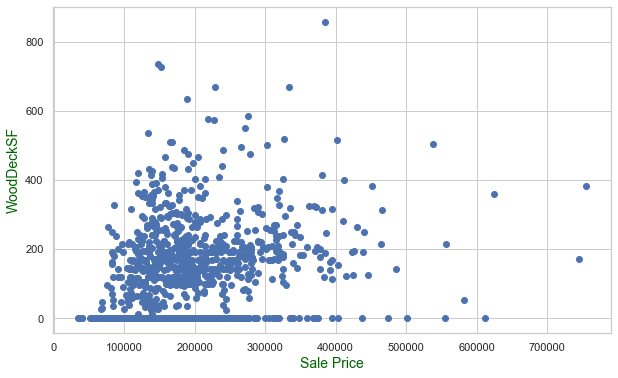

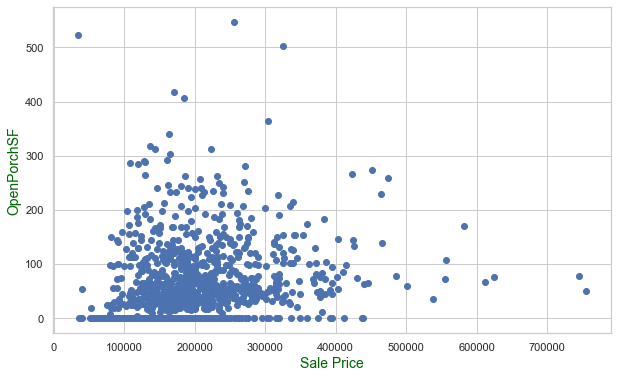

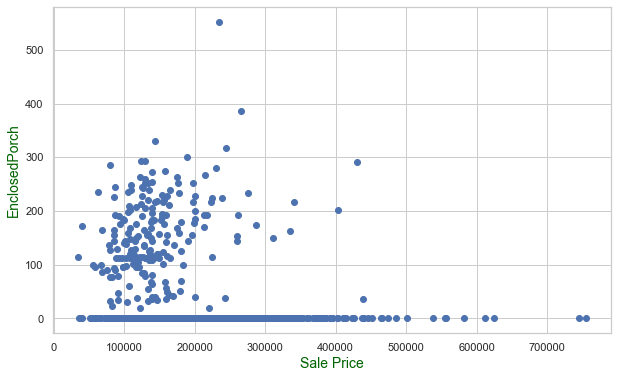

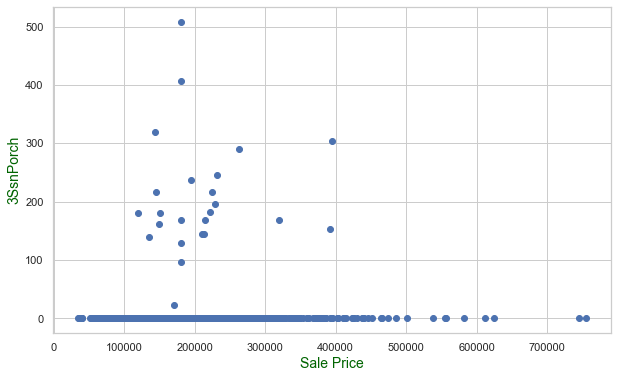

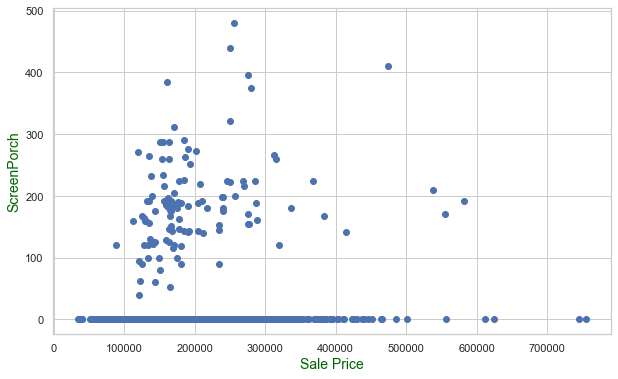

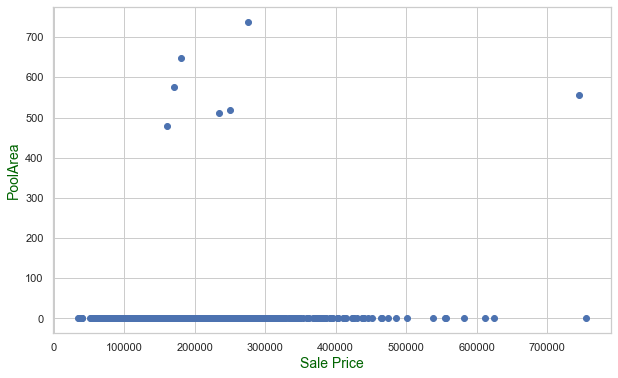

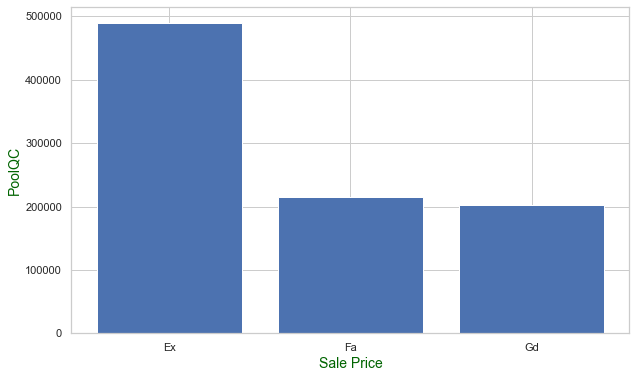

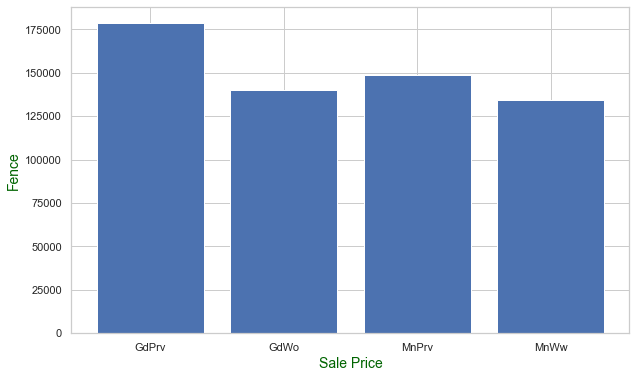

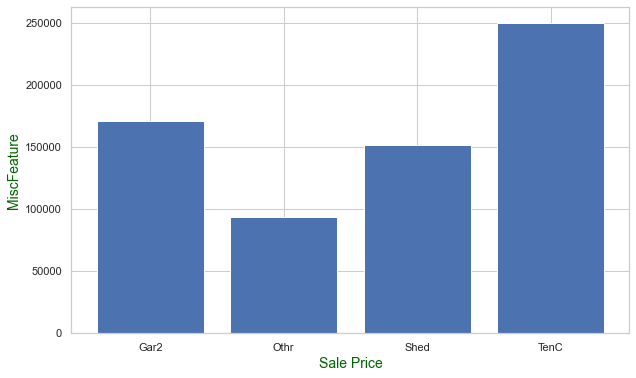

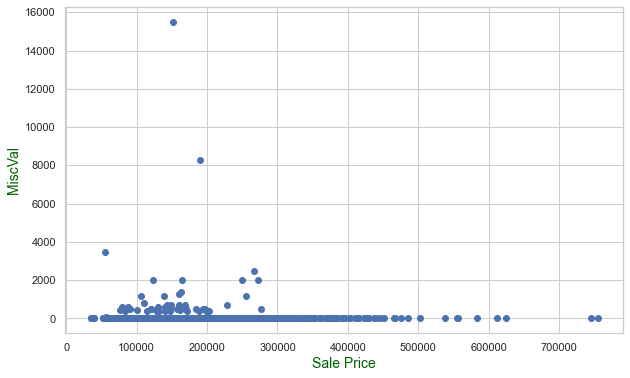

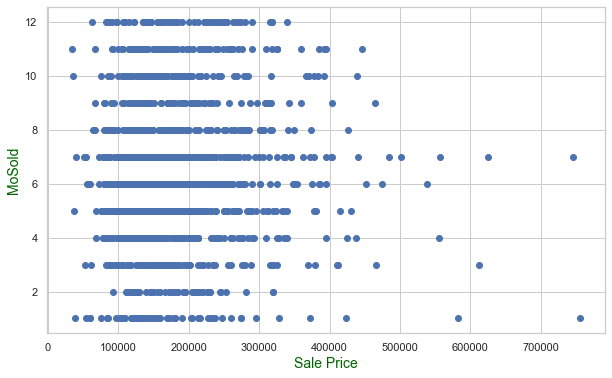

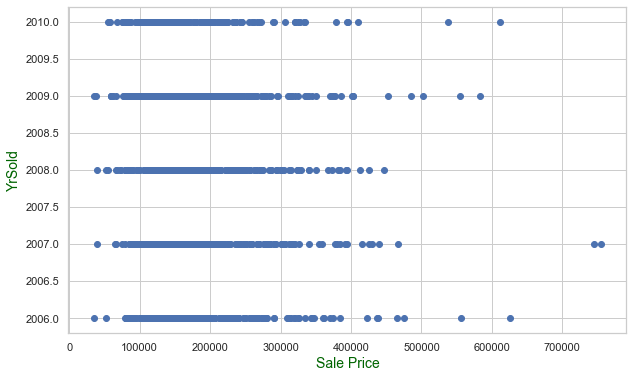

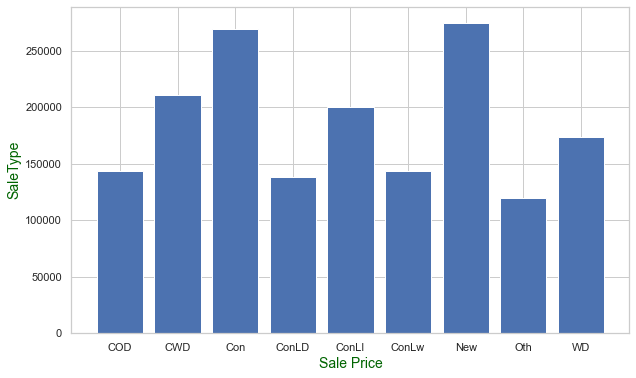

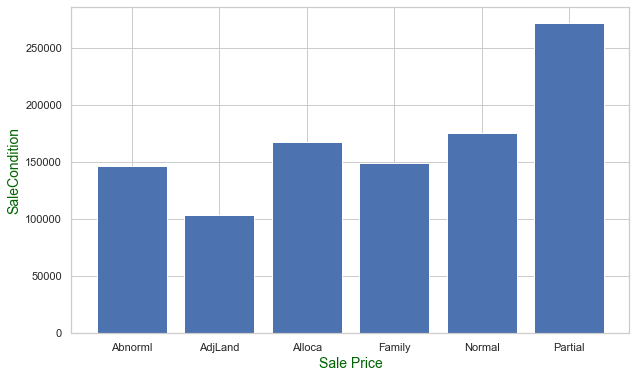

In [5]:
for i in house.columns[1:-1]:
    if (house[i].dtype == "object"):
        plt.bar(house.groupby(i)["SalePrice"].mean().index,
                house.groupby(i)["SalePrice"].mean())
        plt.xlabel("Sale Price", fontdict = axis_font)
        plt.ylabel(f"{i}", fontdict = axis_font)
        plt.show()
    else:
        plt.scatter(house["SalePrice"], house[i])
        plt.xlabel("Sale Price", fontdict = axis_font)
        plt.ylabel(f"{i}", fontdict = axis_font)
        plt.show()

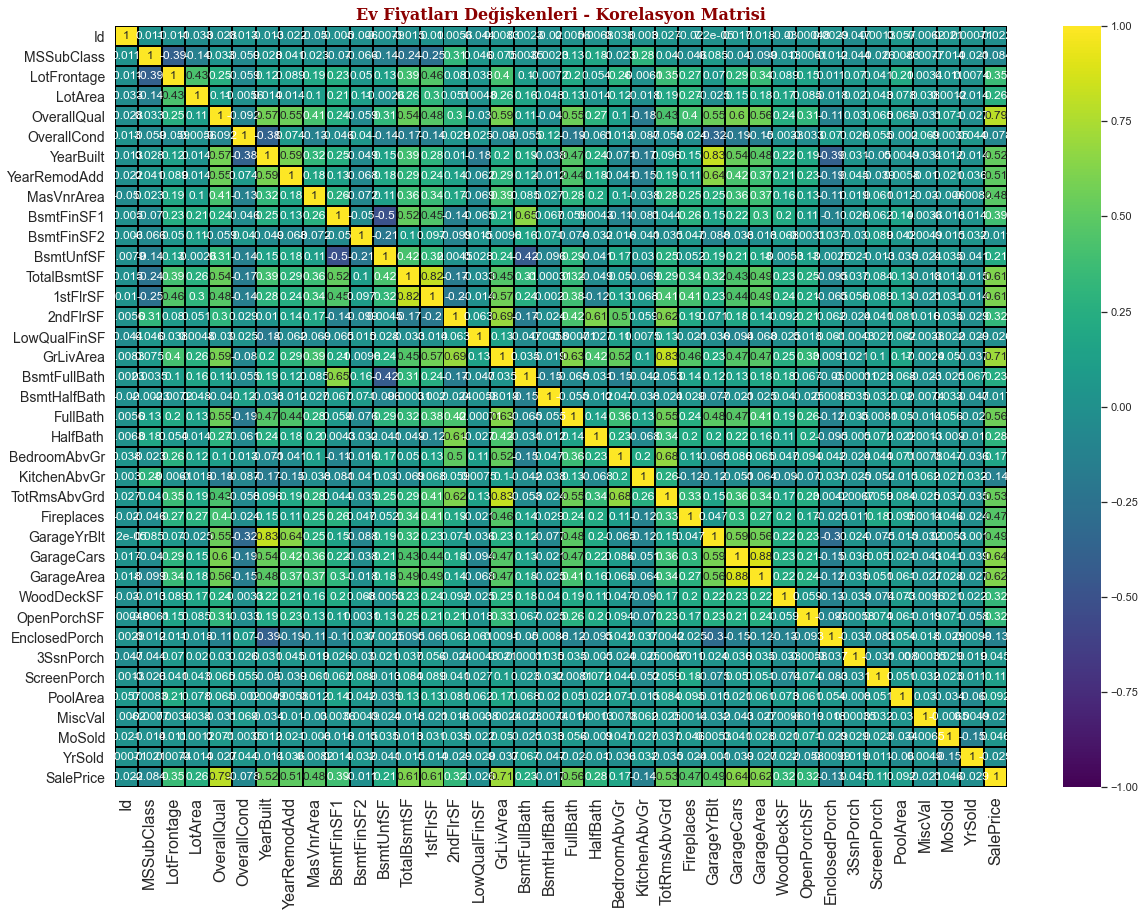

In [6]:
house_corr = house.corr()
plt.figure(figsize=(20,14))
ax = sns.heatmap(house_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask=None)
plt.xticks(size=16)
plt.yticks(size=14)
plt.title("Ev Fiyatları Değişkenleri - Korelasyon Matrisi", fontdict = title_font)
plt.show()

In [7]:
house[["LotArea", "OverallQual", "GarageArea", "YearBuilt", "TotRmsAbvGrd", "YrSold"]].corr()

,LotArea,OverallQual,GarageArea,YearBuilt,TotRmsAbvGrd,YrSold
LotArea,1.000000,0.105806,0.180403,0.014228,0.190015,-0.014261
OverallQual,0.105806,1.000000,0.562022,0.572323,0.427452,-0.027347
GarageArea,0.180403,0.562022,1.000000,0.478954,0.337822,-0.027378
YearBuilt,0.014228,0.572323,0.478954,1.000000,0.095589,-0.013618
TotRmsAbvGrd,0.190015,0.427452,0.337822,0.095589,1.000000,-0.034516
YrSold,-0.014261,-0.027347,-0.027378,-0.013618,-0.034516,1.000000


In [8]:
y = house["SalePrice"]
x = house[["LotArea", "OverallQual", "GarageArea", "YearBuilt", "TotRmsAbvGrd", "YrSold"]]

In [9]:
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     663.4
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:16:24   Log-Likelihood:                -17581.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1453   BIC:                         3.521e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.603e+05   1.63e+06     -0.527      0.598   -4.06e+06    2.34e+06
LotArea          1.0684      0.111      9.610      0.000       0.850       1.286
OverallQual    2.96e+04   1117.993     26.472      0.000    2.74e+04    3.18e+04
GarageArea      66.6873      6.441     10.354      0.000      54.053      79.321
YearBuilt      314.3945     46.170      6.809      0.000     223.827     404.962
TotRmsAbvGrd  1.056e+04    768.369     13.738      0.000    9048.413    1.21e+04
YrSold          64.4211    812.145      0.079      0.937   -1528.681    1657.523
==============================================================================
Omnibus:                      663.770   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15879.366
Skew:                           1.571   Prob(JB):                         0.00
Kurtosis:                      18.848   Cond. No.                     2.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""